# Plots Master

Run any plot you need, only run setup and the window you are interested in.
Choose the data from the dropdown menu and adjust global parameters in setup, if needed.

In [1]:
#general imports
# import h5py
# import meteor
# import reciprocalspaceship as rs
import numpy as np
# import gemmi 
import ipywidgets as widgets
from scipy.ndimage import gaussian_filter
# from output_eval import *

# my imports
from occupancy import *
from plotting3d import *

In [2]:
%load_ext autoreload 
%autoreload 2

In [3]:
# "Latex style"
import matplotlib
matplotlib.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
}
)

# Setup

In [4]:
strict = 0.05
lax = 0.015
alpha_xtrs = np.linspace(1e-2,1, 50)
alpha_xtrs = np.linspace(1e-2,1, 150)
# alpha_xtrs = np.linspace(1e-2,1, 5)
mask_thresh = 0.03

In [5]:
from IPython.display import display

options = (
   "cistrans_nonoise_offset",
   "cistrans_noise_offset", 
   "cistrans_nonoise",
   "cistrans_noise",
   # "cistrans_little_offset",
   # "cistrans_little",
)

dropdown = widgets.Dropdown(
    options=options,
    description='Choose Dataset:',
    value=options[0],
    style={'description_width': 'initial'}
)
display(dropdown)

Dropdown(description='Choose Dataset:', options=('cistrans_nonoise_offset', 'cistrans_noise_offset', 'cistrans…

In [6]:

imagetype = dropdown.value
obj0, obj1, f_dark, f_light, delta_fa_abs, alpha = generate_obj(
    imagetype, kwargs={}
)
config = Config(imagetype, alpha)

delta_obj = obj1-obj0
f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=1, noise_level = 0)

# Plots 

using the following for plot name:cistrans_nonoise_offset


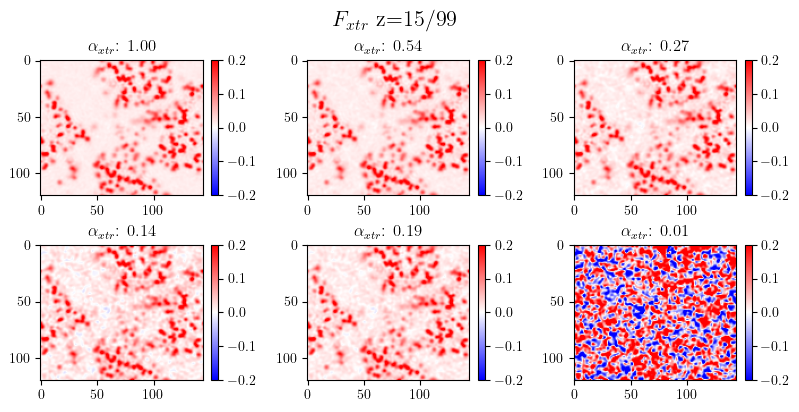

interactive(children=(IntSlider(value=15, description='f0', max=99), Output()), _dom_classes=('widget-interact…

In [7]:
# visualizing the extrapolated structures

alpha_xtrs_vis = np.array([1, alpha * 2, alpha, alpha / 2, 0.19, 0.01])
f_xtrs_vis = make_f_xtr(
    alpha_xtrs_vis, f_dark, f_light, np.angle(f_dark), version=1, noise_level=0
)
dens_xtrs_vis = np.array([np.fft.ifftn(f_xtr).real for f_xtr in f_xtrs_vis])
anim = show_xtrs( dens_xtrs_vis, alpha_xtrs_vis, obj0, alpha, version="only", variant=imagetype, make_gif=False, )

[1.0e-10 1.0e+00 2.0e+00 3.0e+00 4.0e+00 5.0e+00 6.0e+00 7.0e+00 8.0e+00
 9.0e+00 1.0e+01 1.1e+01 1.2e+01 1.3e+01 1.4e+01 1.5e+01 1.6e+01 1.7e+01
 1.8e+01 1.9e+01]
using the following for plot name:cistrans_nonoise_offset
plots/cistrans_nonoise_offset_negsumexplosion.png
using the following for plot name:cistrans_nonoise_offset
../tex/figs/cistrans_nonoise_offset_negsumexplosion.pdf


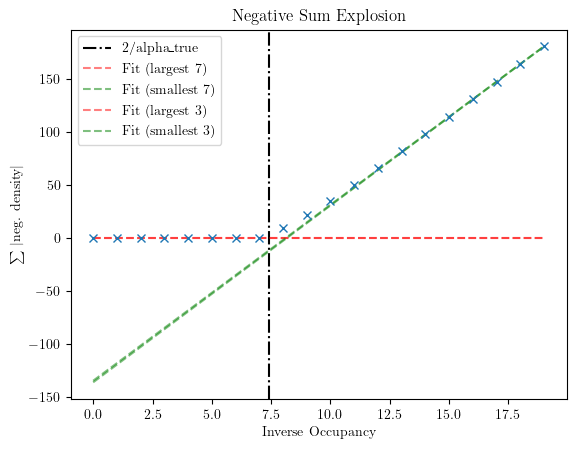

In [8]:
title = "Negative Sum Explosion"

alpha_invs = np.concatenate([
    np.arange(1e-3, 8,0.8),
    np.arange(9, 50,5),
])
alpha_invs = (np.arange(0,20)+1e-10)
print(alpha_invs)
alpha_xtrs_other = 2/alpha_invs
delta_obj = obj1-obj0
mask_pks_neg = (delta_obj)<-mask_thresh
f_xtrs_other = make_f_xtr(alpha_xtrs_other, f_dark, f_light, np.angle(f_dark),  version=1, noise_level = 0)
_, neg_sum = marius(f_xtrs_other, mask_pks_neg)
n_largest = 7
n_more = 3

neg_sum_explosion(alpha_invs, neg_sum, config, n_largest, n_more, title=title)

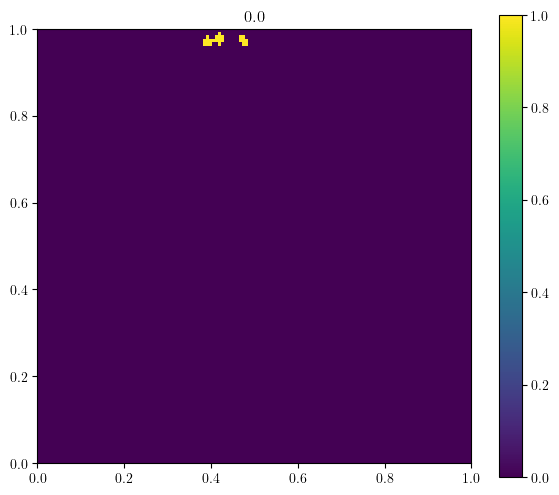

interactive(children=(IntSlider(value=0, description='f0', max=99), Output()), _dom_classes=('widget-interact'…

/Users/sbielfel/Nextcloud2/time_resolved/occupancy-estimation/occupancy.py:330: RuntimeWarning: invalid value encountered in scalar divide
  peak_neg[ii] = ((dens_mask[dens_mask < 0])).sum() / dens[dens < 0].sum()


using the following for plot name:cistrans_nonoise_offset
plots/cistrans_nonoise_offset_differencemap.png
using the following for plot name:cistrans_nonoise_offset
../tex/figs/cistrans_nonoise_offset_differencemap.pdf


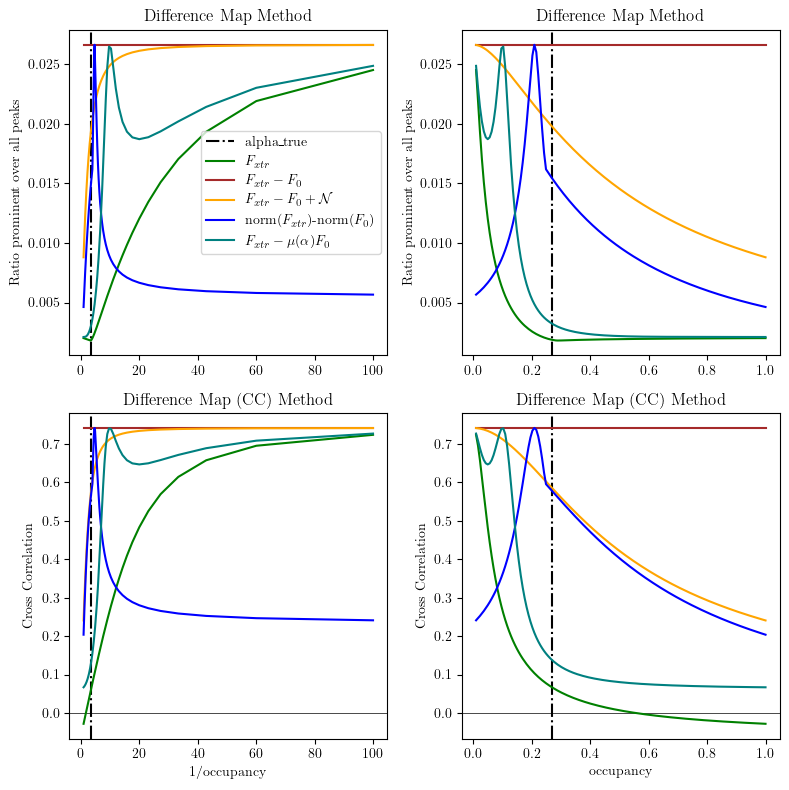

In [9]:
delta_obj = obj1-obj0
mask_pks = np.abs(delta_obj)>mask_thresh
# mask_pks = (delta_obj)<-0.05
_ = slice_3d(mask_pks)
from occupancy import x8_density_map_fdiff_alpha
difference_map_plot(alpha_xtrs, f_xtrs, mask_pks, obj0, delta_obj, config, save_output=True)

share of active pixel: 0.153%
share of active pixel: 0.019%


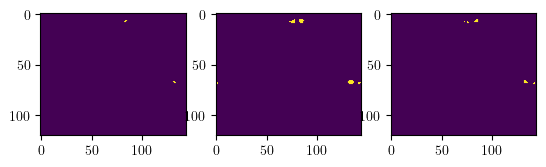

using the following for plot name:cistrans_nonoise_offset
plots/cistrans_nonoise_offset_pandda_bins.png
using the following for plot name:cistrans_nonoise_offset
../tex/figs/cistrans_nonoise_offset_pandda_bins.pdf
using the following for plot name:cistrans_nonoise_offset
plots/cistrans_nonoise_offset_pandda.png
using the following for plot name:cistrans_nonoise_offset
../tex/figs/cistrans_nonoise_offset_pandda.pdf


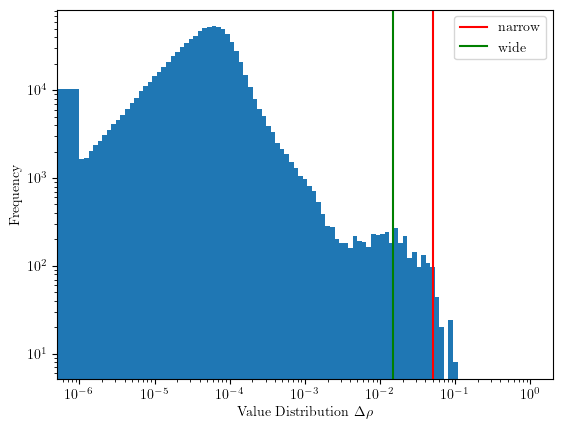

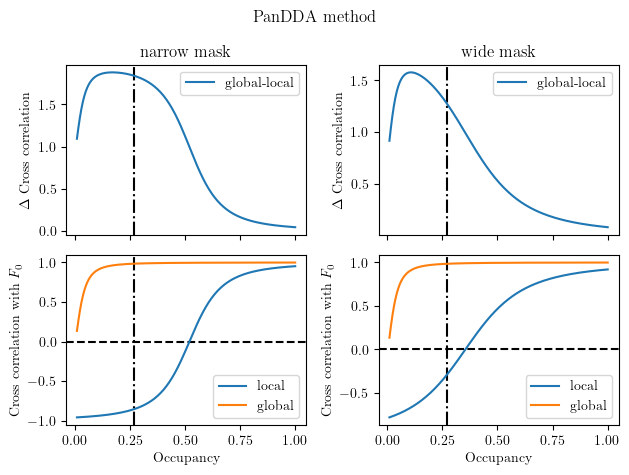

In [10]:
# mask_pks = gaussian_filter(np.abs(delta_obj),1)>0.01
mask_pks_lax = (np.abs(delta_obj))>lax
mask_pks_strict = gaussian_filter(np.abs(delta_obj),1)>strict
mask_pks_lax = gaussian_filter(np.abs(delta_obj),1)>lax
mask_pks_strict = (np.abs(delta_obj))>strict
mask_pks_general = (np.abs(delta_obj))>mask_thresh
for mask in [mask_pks_lax, mask_pks_strict]:
    print(f"share of active pixel: {np.sum(mask)/mask.size:.3%}")
    
fig,axs=plt.subplots(1,3)
axs[0].imshow(mask_pks_strict[0])
axs[1].imshow(mask_pks_lax[0])
axs[2].imshow(mask_pks_general[0])
plt.show()

pandda_bin_comp(delta_obj, strict, lax, config)

pandda_plot(alpha_xtrs, f_xtrs, f_dark, mask_pks_lax, mask_pks_strict, config)


using the following for plot name:cistrans_nonoise_offset
plots/cistrans_nonoise_offset_density_matching_blobs.png
using the following for plot name:cistrans_nonoise_offset
../tex/figs/cistrans_nonoise_offset_density_matching_blobs.pdf
using the following for plot name:cistrans_nonoise_offset
plots/cistrans_nonoise_offset_density_matching_voxel.png
using the following for plot name:cistrans_nonoise_offset
../tex/figs/cistrans_nonoise_offset_density_matching_voxel.pdf


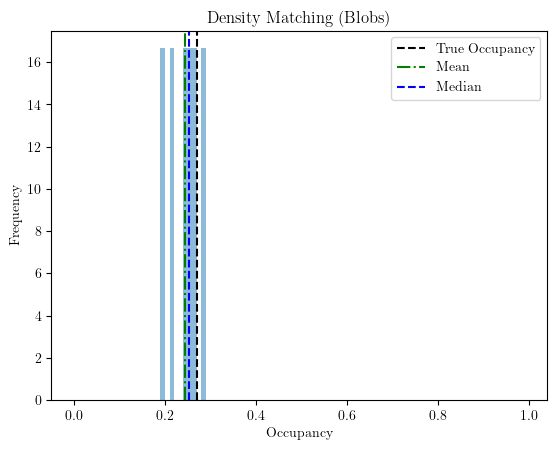

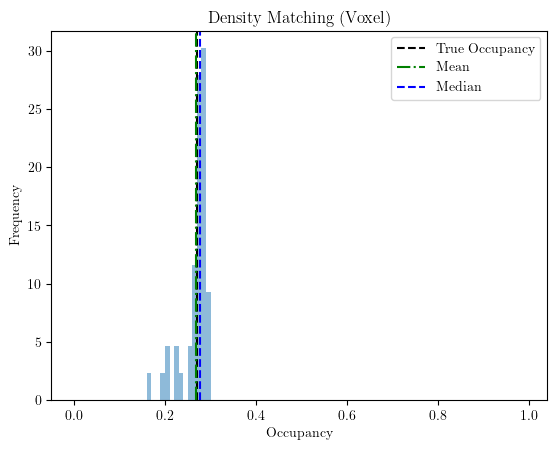

In [11]:
from plotting3d import density_matching
save_plot = True
mask_pks_neg = delta_obj<-strict
density_matching(f_xtrs, alpha_xtrs, mask_pks_neg, config)

# Rename files after the fact

In [12]:
for ns in ["no",""]:
    for tp in ["blobs"]:
        pass
        name = f"../tex/figs/cistrans_{ns}noise_offset_density_matching_{tp}"
        end = '.pdf'
        name_in = name+end
        name_out = name+"_lthresh"+end
        #!mv $name_in $name_out
        !echo "mv $name_in $name_out"

mv ../tex/figs/cistrans_nonoise_offset_density_matching_blobs.pdf ../tex/figs/cistrans_nonoise_offset_density_matching_blobs_lthresh.pdf
mv ../tex/figs/cistrans_noise_offset_density_matching_blobs.pdf ../tex/figs/cistrans_noise_offset_density_matching_blobs_lthresh.pdf
